<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# Taller 01: Python, Numpy and Pandas

## <span style="color:red"> Outline </span> 

1. [Ejercicio 1. numpy](#eje1)
2. [Ejercicio 2. numpy](#eje2)
3. [Ejercicio 3. pandas](#eje5)
4. [Ejercicio 4. pandas](#eje6)
5. [Ejercicio 5. pandas](#eje7)


In [1]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
#from google.colab import drive
#drive.mount('/content/drive')
#os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student/talleres20201')
#os.chdir('/content/drive/My Drive/ai-uis-student/talleres20201')
#print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

# Usted debe ejecutar <span style="color:#F00;">TODAS</span> las celdas de tipo <span style="color:#F00;">CODE</span>. De lo contrario, sus respuestas no serán procesadas correctamente.</h2>
---

---

### Ejercicio 1  <a name="eje1"></a>

Las combinaciones lineales son una de las operaciones matemáticas mas importantes en aprendizaje de máquina e inteligencia artificial. Por ejemplo, el modelo de un neurona (principio de los metodos mas famosos de clasificación) puede modelarse como una combinación lineal de unas entradas que se múltiplican por unos pesos y se les suma un *bias*. 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/dl1.jpg" /> 

Esta representación gráfica se puede representar como $$y = \sum_{i=1}^{3}{ x_i \dot w_i } +b = XW^\top$$. 
Implemente una función que calcule la combinación lineal de un vector $\mathbf{X}$, unos pesos $\mathbf{W}$ y un sesgo (*bias*) $b$


In [5]:
def fun_eje_1_17(X, W, b):
    import numpy as np
    
    y = np.sum(X*W)+b
    
    return y

#Colaboratory
#import urllib.parse, inspect
#src17 = urllib.parse.quote_plus(inspect.getsource(fun_eje_1_17))

#Virtualbox
import urllib, inspect
src17 = urllib.quote_plus(inspect.getsource(fun_eje_1_17))

Prueba tu código:

Dados los valores iniciales:
$X = \begin{bmatrix}3\\2\\8\end{bmatrix}$ <br><br>
Con sus respectivos pesos:
$W = [0.1, 0.3, 0.6]$ <br><br>
Y un sesgo de $b=33$.

In [6]:
import numpy as np
X = np.array([3,2,8] )
W = np.array([0.1, 0.3, 0.6])
b=33
fun_eje_1_17(X, W, b)

38.700000000000003

#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [8]:
!./run CHECK_SOLUTION PS1_17 $src17

evaluation result CORRECT


---

### Ejercicio 2  <a name="eje2"></a>


Dado un `array` $\mathbf{A} \in \mathbb{R}^{m \times n}$ de $m$ filas y $n$ columnas.  Cree una función que calcule la **media, y el máximo** de cada columna, cada  fila y de la matrix completa. El resultado de operaciones por columna son estructuras de tipo `array` de $n$ elementos, de las filas son de $m$ elementos, y las operaciones de las matrices es un valor escalar. 


In [9]:
def fun_eje_1_18(A):
    import numpy as np
    

    vec_mean_c = np.mean(A, axis=0)
    vec_max_c  = np.max(A, axis=0)
    vec_mean_f = np.mean(A, axis=1)
    vec_max_f  = np.max(A, axis=1)
    vec_mean_m = np.mean(A)
    vec_max_m  = np.max(A)
    
    return vec_mean_c, vec_max_c, vec_mean_f, vec_max_f, vec_mean_m, vec_max_m

#Colaboratory
#import urllib.parse, inspect
#src18 = urllib.parse.quote_plus(inspect.getsource(fun_eje_1_18))

#Virtualbox
import urllib, inspect
src18 = urllib.quote_plus(inspect.getsource(fun_eje_1_18))

Compruebe su respuesta

In [10]:
import numpy as np
A = np.random.rand(3,2)
print(A)
vec_mean_c, vec_max_c, vec_mean_f, vec_max_f, vec_mean_m, vec_max_m = fun_eje_1_18(A)
print("vec_mean_c: ", vec_mean_c)
print("vec_mean_f: ", vec_mean_f)
print("vec_mean_m: ", vec_mean_m)

[[ 0.15323852  0.45355796]
 [ 0.90229837  0.28064987]
 [ 0.51758167  0.37458178]]
('vec_mean_c: ', array([ 0.52437285,  0.36959654]))
('vec_mean_f: ', array([ 0.30339824,  0.59147412,  0.44608172]))
('vec_mean_m: ', 0.44698469414679454)


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [11]:
!./run CHECK_SOLUTION PS1_18 $src18

evaluation result CORRECT


---
## Comportamiento del producto interno Bruto a nivel Mundial

En los siguientes puntos vamos a explorar un dataset que describe el  crecimiento de la población mundial (`pop`) por país (`country`), y además describe el comportamiento del producto interno bruto (`gdpPercap`) y la experanza de vida (`lifeExp`).   

In [12]:
import pandas as pd

data = pd.read_csv('misc/FiveYearData.csv')

data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


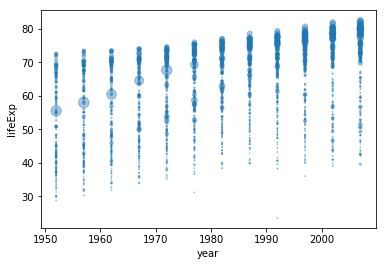

In [14]:
import matplotlib.pyplot as plt
data.plot(kind="scatter", x="year", y="lifeExp", alpha=0.4, s=data["gdpPercap"]/1000)


### Ejercicio 3  (Pandas) <a name="eje5"></a>

**Calculando nuevas caracteristicas del dataset**

Escriba una función que le agregue una columna al dataframe `data`. La nueva columna debe llamarse `corr_movil` y debe calcular la correlación movil entre las columnas `lifeExp` y `gdpPercap`. La ventana de la correlación movil debe ser calculada con una ventana de tamaño `10`. Los primeros datos serán `NaN` pero deben ser "rellenados" con el valor global de la correlación entre estas dos variables. 

La función debe devolver el datadrame `data` con la nueva columna y ademas se deve devolver la matrix de correlación general entre estas dos caracteristicas. 


In [15]:
def fun_eje_1_19(): 
    import numpy as np
    import pandas as pd
    
    data = pd.read_csv('misc/FiveYearData.csv')
    data["corr_movil"]=data.lifeExp.rolling(window=10).corr(other=data.gdpPercap)
    data.corr_movil.fillna(data.lifeExp.corr(other=data.gdpPercap), inplace=True)
    data_mod = data
    corr_mat = data[["lifeExp","gdpPercap"]].corr()
    
    
    return data_mod, corr_mat

#Colaboratory
#import urllib.parse, inspect
#src19 = urllib.parse.quote_plus(inspect.getsource(fun_eje_1_19))

#Virtualbox
import urllib, inspect
src19 = urllib.quote_plus(inspect.getsource(fun_eje_1_19))

Su función debe devolver los siguientes datos: 

In [16]:
data_mod, corr_mat = fun_eje_1_19()
print(corr_mat)
data_mod.head(10)

            lifeExp  gdpPercap
lifeExp    1.000000   0.583706
gdpPercap  0.583706   1.000000


,country,year,pop,continent,lifeExp,gdpPercap,corr_movil
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,0.583706
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,0.583706
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,0.583706
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,0.583706
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,0.583706
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360,0.583706
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439,0.583706
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945,0.583706
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395,0.583706
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351,-0.255703


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [17]:
!./run CHECK_SOLUTION PS1_19 $src19

evaluation result CORRECT


### Ejercicio 4  (Pandas) <a name="eje6"></a>

**Agrupamiento.** 
Una de los mecanismos mas sofisticados para entender, analizar y visualizar los datos son los métodos de agrupamiento. Pandas ofrece varios metodos de agrupamiento como es `groupby` y `pivot_table`. Para entender mejor su potencialidad vamos a crear una función que cree y retorne dos nuevos dataframes, con la siguiente descripción: 

- Un dataframe que agrupe la información por los continentes y calcule en cada registro la operación media. 
- Un dataframe construido con `pivot_table` que permita observar mas detalladamente la información.  Esta tabla debe indexar los datos por `year`, la columna debe ser `continent` y la función que debe operar es `max` 




In [18]:
def fun_eje_1_20(): 
    import numpy as np
    import pandas as pd
    
    
    data_mod = pd.read_csv('misc/FiveYearData.csv')


    DF_cont = data_mod.groupby("continent").mean()
    pivot_t = pd.pivot_table(data_mod, index=['year'], columns=['continent'], aggfunc=[max])
    
    return DF_cont, pivot_t

#Colaboratory
#import urllib.parse, inspect
#src20 = urllib.parse.quote_plus(inspect.getsource(fun_eje_1_20))

#Virtualbox
import urllib, inspect
src20 = urllib.quote_plus(inspect.getsource(fun_eje_1_20))

Verifique su respuesta. Los nuevos dataframes deberian ser: 

In [19]:
F_cont, pivot_t = fun_eje_1_20()
F_cont.head()

,year,pop,lifeExp,gdpPercap
continent,,,,
Africa,1979.5,9.916003e+06,48.865330,2193.754578
Americas,1979.5,2.450479e+07,64.658737,7136.110356
Asia,1979.5,7.703872e+07,60.064903,7902.150428
Europe,1979.5,1.716976e+07,71.903686,14469.475533
Oceania,1979.5,8.874672e+06,74.326208,18621.609223


In [20]:
pivot_t.head(10)

max                                                      \
            country                                                       
continent    Africa   Americas        Asia          Europe      Oceania   
year                                                                      
1952       Zimbabwe  Venezuela  Yemen Rep.  United Kingdom  New Zealand   
1957       Zimbabwe  Venezuela  Yemen Rep.  United Kingdom  New Zealand   
1962       Zimbabwe  Venezuela  Yemen Rep.  United Kingdom  New Zealand   
1967       Zimbabwe  Venezuela  Yemen Rep.  United Kingdom  New Zealand   
1972       Zimbabwe  Venezuela  Yemen Rep.  United Kingdom  New Zealand   
1977       Zimbabwe  Venezuela  Yemen Rep.  United Kingdom  New Zealand   
1982       Zimbabwe  Venezuela  Yemen Rep.  United Kingdom  New Zealand   
1987       Zimbabwe  Venezuela  Yemen Rep.  United Kingdom  New Zealand   
1992       Zimbabwe  Venezuela  Yemen Rep.  United Kingdom  New Zealand   
1997       Zimbabwe  Venezuela  Yemen Rep.  United Kingdom  New Zealand   

                                                                              \
              gdpPercap                                                        
continent        Africa     Americas          Asia       Europe      Oceania   
year                                                                           
1952        4725.295531  13990.48208  108382.35290  14734.23275  10556.57566   
1957        5487.104219  14847.12712  113523.13290  17909.48973  12247.39532   
1962        6757.030816  16173.14586   95458.11176  20431.09270  13175.67800   
1967       18772.751690  19530.36557   80894.88326  22966.14432  14526.12465   
1972       21011.497210  21806.03594  109347.86700  27195.11304  16788.62948   
1977       21951.211760  24072.63213   59265.47714  26982.29052  18334.19751   
1982       17364.275380  25009.55914   33693.17525  28397.71512  19477.00928   
1987       11864.408440  29884.35041   28118.42998  31540.97480  21888.88903   
1992       13522.157520  32003.93224   34932.91959  33965.66115  23424.76683   
1997       14722.841880  35767.43303   40300.61996  41283.16433  26997.93657   

                                                                            \
          lifeExp                                         pop                
continent  Africa Americas   Asia Europe Oceania       Africa     Americas   
year                                                                         
1952       52.724    68.75  65.39  72.67   69.39   33119096.0  157553000.0   
1957       58.089    69.96  67.84  73.47   70.33   37173340.0  171984000.0   
1962       60.246    71.30  69.39  73.68   71.24   41871351.0  186538000.0   
1967       61.557    72.13  71.43  74.16   71.52   47287752.0  198712000.0   
1972       64.274    72.88  73.42  74.72   71.93   53740085.0  209896000.0   
1977       67.064    74.21  75.38  76.11   73.49   62209173.0  220239000.0   
1982       69.885    75.76  77.11  76.99   74.74   73039376.0  232187835.0   
1987       71.913    76.86  78.67  77.41   76.32   81551520.0  242803533.0   
1992       73.615    77.95  79.36  78.77   77.56   93364244.0  256894189.0   
1997       74.772    78.61  80.69  79.39   78.83  106207839.0  272911760.0   

                                                 
                                                 
continent          Asia      Europe     Oceania  
year                                             
1952       5.562635e+08  69145952.0   8691212.0  
1957       6.374080e+08  71019069.0   9712569.0  
1962       6.657700e+08  73739117.0  10794968.0  
1967       7.545500e+08  76368453.0  11872264.0  
1972       8.620300e+08  78717088.0  13177000.0  
1977       9.434550e+08  78160773.0  14074100.0  
1982       1.000281e+09  78335266.0  15184200.0  
1987       1.084035e+09  77718298.0  16257249.0  
1992       1.164970e+09  80597764.0  17481977.0  
1997       1.230075e+09  82011073.0  18565243.0

#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [21]:
!./run CHECK_SOLUTION PS1_20 $src20

evaluation result CORRECT


---

### Ejercicio 5 (Pandas)  <a name="eje7"></a>

Cuando se trabaja en análisis de datos es muy común realizar preprocesamiento, normalización y escalado de los datos, fácilitando el funcionamiento de los algoritmos. El rango y escala de los datos puede causar problemas numéricos y de convergencia de algunos metodos. 

Debemos desarrollar una función que realice la normalización de las columnas: [`pop`,`lifeExp`,`gdpPercap`] aplicando la transformación: $$Z = \frac{x - mean(x)}{stdev(x)}$$ la media y la desviación estándar son calculadas por cada columna de manera independiente.

In [22]:
def fun_eje_1_21(): 
    import numpy as np
    import pandas as pd
    
    
    data_mod = pd.read_csv('misc/FiveYearData.csv')
    data_mod['pop'] = (data_mod['pop']- data_mod['pop'].mean())/ np.std(data_mod['pop'])
    data_mod['lifeExp'] = (data_mod['lifeExp']- data_mod['lifeExp'].mean())/ np.std(data_mod['lifeExp'])
    data_mod['gdpPercap'] = (data_mod['gdpPercap']- data_mod['gdpPercap'].mean())/ data_mod['gdpPercap'].std()
    DF_scaled = data_mod
    
    
    return DF_scaled

#Colaboratory
#import urllib.parse, inspect
#src21 = urllib.parse.quote_plus(inspect.getsource(fun_eje_1_21))

#Virtualbox
import urllib, inspect
src21 = urllib.quote_plus(inspect.getsource(fun_eje_1_21))

Tienes que tener un dataframe escalado, como:

In [23]:
fun_eje_1_21().head(10)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,-0.199534,Asia,-2.375334,-0.652895
1,Afghanistan,1957,-0.191849,Asia,-2.256774,-0.648694
2,Afghanistan,1962,-0.182180,Asia,-2.127837,-0.645423
3,Afghanistan,1967,-0.170204,Asia,-1.971178,-0.647138
4,Afghanistan,1972,-0.155679,Asia,-1.811033,-0.656898
5,Afghanistan,1977,-0.138710,Asia,-1.629050,-0.652218
6,Afghanistan,1982,-0.157542,Asia,-1.519396,-0.632751
7,Afghanistan,1987,-0.148250,Asia,-1.444434,-0.645494
8,Afghanistan,1992,-0.125164,Asia,-1.378456,-0.666093
9,Afghanistan,1997,-0.069481,Asia,-1.371564,-0.667514


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [24]:
!./run CHECK_SOLUTION PS1_21 $src21

evaluation result CORRECT


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Pasos Finales. 


#### 1. Reemplace la variable con su código de estudiante

In [25]:
#Colaboratory
#import urllib.parse, inspect
#taller = urllib.parse.quote_plus("Taller_01_20201_Numpy-Pandas")
#codigo = urllib.parse.quote_plus("tl1_2170688")

#Virtualbox
import urllib, inspect
taller = urllib.quote_plus("Taller_01_20201_Numpy-Pandas")
codigo = urllib.quote_plus("tl1_2170688")

print(taller, codigo)

('Taller_01_20201_Numpy-Pandas', 'tl1_2170688')


#### 2. Guarde los cambios del taller:

In [26]:
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

#### 3. Ejecute la siguiente celda y envíe el archivo comprimido

In [133]:
!./convert_ipynb.sh $codigo $taller

uno: tl1_2170688 dos Taller_01_20201_Numpy-Pandas
¡PERFECTO!, el archivo   'tl1_2170688.ipynb'   se creó correctamente :D


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>